<a href="https://colab.research.google.com/github/AhmadAlabrash/machine-learning/blob/main/RO_kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
from sklearn.cluster import k_means
from sklearn.preprocessing import MinMaxScaler

In [252]:
df = pd.read_csv('/content/weather.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


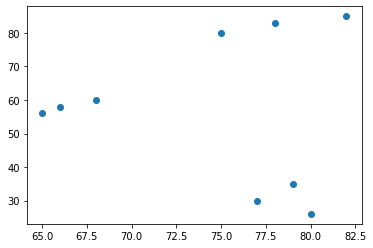

In [253]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.temperature , df.humidity)


In [254]:
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [255]:
km = k_means(n_clusters=3,X=df.iloc[:,2:])
km

(array([[66.33333333, 58.        ],
        [78.66666667, 30.33333333],
        [78.33333333, 82.66666667]]),
 array([0, 0, 0, 2, 2, 2, 1, 1, 1], dtype=int32),
 95.33333333333333)

In [256]:
df['km']=km[1]

In [257]:
df0=df[df.km == 0 ]
df1=df[df.km == 1 ]
df2=df[df.km == 2 ]

In [258]:
km[0][:,0]

array([66.33333333, 78.66666667, 78.33333333])

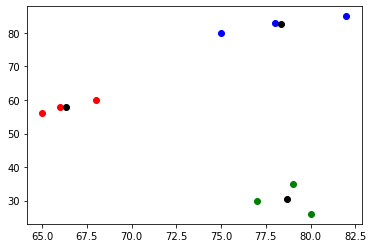

In [259]:
plt.scatter(df0.temperature , df0.humidity,color='red')
plt.scatter(df1.temperature , df1.humidity,color='green')
plt.scatter(df2.temperature , df2.humidity,color='blue')
plt.scatter(km[0][:,0] ,km[0][:,1],color='black')

In [260]:
sc =MinMaxScaler()
sc1 =MinMaxScaler()
sc.fit(df[['temperature']])
df['x'] =sc.transform(df[['temperature']])

sc1.fit(df[['humidity']])
df['y'] =sc1.transform(df[['humidity']])

In [261]:
km = k_means(n_clusters=3,X=df.iloc[:,5:7])
df0=df[df.km == 0 ]
df1=df[df.km == 1 ]
df2=df[df.km == 2 ]

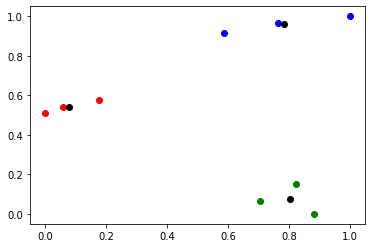

In [262]:
plt.scatter(df0.x , df0.y,color='red')
plt.scatter(df1.x , df1.y,color='green')
plt.scatter(df2.x , df2.y,color='blue')
plt.scatter(km[0][:,0] ,km[0][:,1],color='black')

In [263]:
df

,date,city,temperature,humidity,km,x,y
0,5/1/2017,new york,65,56,0,0.000000,0.508475
1,5/2/2017,new york,66,58,0,0.058824,0.542373
2,5/3/2017,new york,68,60,0,0.176471,0.576271
3,5/1/2017,mumbai,75,80,2,0.588235,0.915254
4,5/2/2017,mumbai,78,83,2,0.764706,0.966102
5,5/3/2017,mumbai,82,85,2,1.000000,1.000000
6,5/1/2017,beijing,80,26,1,0.882353,0.000000
7,5/2/2017,beijing,77,30,1,0.705882,0.067797
8,5/3/2017,beijing,79,35,1,0.823529,0.152542


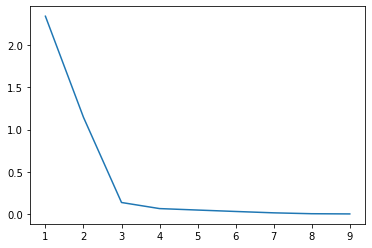

In [272]:
#we must do it firstly to knew how many cluster we should put named(elbo plot metho)
from numpy import append
k_number = range(1,10)
see =[]

for i in k_number :
  kma =k_means(n_clusters=i,X=df.iloc[:,5:7])
  see.append(kma[2])

plt.plot(k_number,see )  